In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import autograd.numpy as np

# add the data folder to path (this specifies a relative path to where my data is stored)
import os, sys
sys.path.append(os.path.join(os.getcwd(), "../data"))
from data import data_utils 

In [2]:
x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('iris')
x_train = np.hstack([np.ones(x_train.shape[0]).reshape(-1,1), x_train])
x_valid = np.hstack([np.ones(x_valid.shape[0]).reshape(-1,1), x_valid])
x_test = np.hstack([np.ones(x_test.shape[0]).reshape(-1,1), x_test])

x_train = np.vstack([x_train, x_valid])

y_train = np.vstack([y_train, y_valid])
y_train, y_test = y_train[:,(1,)], y_test[:,(1,)]





In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def Probability(X, W):
    return sigmoid(np.dot(X,W))

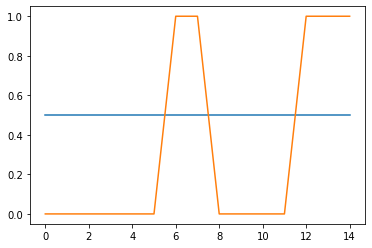

In [5]:
W = np.zeros(5)
prediction = Probability(x_test, W)

plt.plot(prediction)
plt.plot(y_test)

In [6]:
def accuracy(y,ypredicted):
    count = len(y)
    correct = 0
    for i in range(0,len(y)):
        if y[i] == 0 and ypredicted[i] < .5:
            correct += 1
        elif y[i] == 1 and ypredicted[i] > .5:
            correct += 1
    return correct/count

In [12]:
def update_parameters(w, grad_w, learning_rate=1.):    
    return w + learning_rate * grad_w


def likelihood(x,y,w):
    prob = Probability(x, w)
    a = np.dot(y.T, np.log(prob))
    b = np.dot((1 - y).T, np.log(1 - prob))
        
    return a + b

def prior(w,var):
    
    a = w.shape[0] * np.log(2 * np.pi) / 2 
    b = w.shape[0] * np.log(var) / 2
    c = np.dot(w.T, w) / (2 * var) 
        
    return a + b - c



    
def likelihood_grad(x,y,w):
#     p = Probability(x, w)
#     print('shape of prob',p.shape)
#     p = y
#     print('shape of y',y.shape)

    prob = (y.reshape(-1) - Probability(x, w))
#     print('shape of prob',prob.shape)
#     print('x shape', x.shape)
    prob = np.dot(prob,x)
#     print('shape of prob',prob.shape)
    return prob

def likelihood_grad_2(x,y,w):
#     p = Probability(x, w)
#     print('shape of prob',p.shape)
#     p = y
#     print('shape of y',y.shape)

    hessMatrix = np.zeros((x.shape[1], x.shape[1]))
    prob = Probability(x, w)
    value = np.multiply(prob, prob - 1)
    for i in range(x.shape[0]):
        hessMatrix = np.add(hessMatrix, np.outer(x[i], x[i].T) * value[i])
    return hessMatrix    
    
#     prob = Probability(x, w)
#     prob = prob - 1
# #     print('shape of prob',prob.shape)
#     prob = np.dot(prob,prob)
#     print('shape of prob',prob.shape)
#     prob = np.dot(x,prob)
#     print('shape of prob',prob.shape)
#     prob = np.dot(prob,x.T)
#     print('shape of prob',prob.shape)

#     return prob


# print(likelihood_grad(x_train,y_train,W))


# print(likelihood_grad_2(x_train,y_train,W))

def prior_grad(w,var):
    
    return -w/var

def prior_grad_2(w,var):
    
    return -np.identity(w.size)/var

def log_gw(H):
        
    a = len(H) / 2 * np.log(2 * np.pi)
#     print(a)
    b = np.linalg.det(-H)
#     print(b)
    b = 1/2 * np.log(b)

    return b - a


# print(log_gw(Hess))


Marginal Likelihood is  [-69.09987109]
iteration mumber  1089
Accuracy is 0.7333333333333333


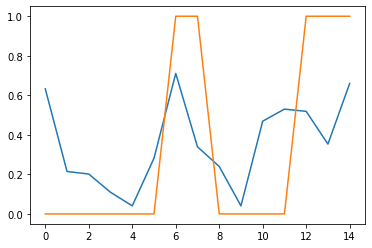

In [35]:
W = np.zeros(5)
learning_rate = 0.005
# losses = []
var = .5
i = 0

W_grad  = [1]
while(max(W_grad) > 0.000001):
    i += 1
    W_grad = likelihood_grad(x_train,y_train,W) + prior_grad(W,var)
    W = update_parameters(W, W_grad, learning_rate)
#     losses.append(loss(x_train,y_train, W).reshape(-1))
#     if i==0 or (i+1) % 200 == 0:
#         print("Iter %3d, loss = %.6f" % (i+1, loss(x_train,y_train, W)))
#         print(max(W_grad))


Hess = likelihood_grad_2(x_train,y_train,W) + prior_grad_2(W, var)
# print(Hess.shape)
# print(log_gw(Hess))

margLikelihood = likelihood(x_train,y_train,W) + prior(W,var) - log_gw(Hess)
print('Marginal Likelihood is ', margLikelihood)
print('iteration mumber ', i)


prediction = Probability(x_test, W)
acc = accuracy(y_test,prediction)
print('Accuracy is', acc)
plt.plot(prediction)
plt.plot(y_test)
plt.show()

Marginal Likelihood is  [-65.31653277]
iteration mumber  1840
Accuracy is 0.7333333333333333


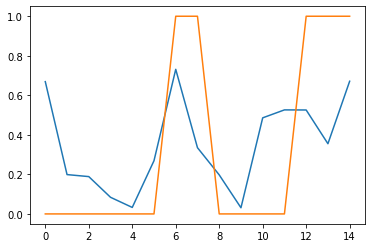

In [34]:
W = np.zeros(5)
learning_rate = 0.005
# losses = []
var = 1
i=0

W_grad  = [1]
while(max(W_grad) > 0.000001):
    i += 1
    W_grad = likelihood_grad(x_train,y_train,W) + prior_grad(W,var)
    W = update_parameters(W, W_grad, learning_rate)
#     losses.append(loss(x_train,y_train, W).reshape(-1))
#     if i==0 or (i+1) % 200 == 0:
#         print("Iter %3d, loss = %.6f" % (i+1, loss(x_train,y_train, W)))
#         print(max(W_grad))


Hess = likelihood_grad_2(x_train,y_train,W) + prior_grad_2(W, var)
# print(Hess.shape)
# print(log_gw(Hess))

margLikelihood = likelihood(x_train,y_train,W) + prior(W,var) - log_gw(Hess)
print('Marginal Likelihood is ', margLikelihood)
print('iteration mumber ', i)


prediction = Probability(x_test, W)
acc = accuracy(y_test,prediction)
print('Accuracy is', acc)
plt.plot(prediction)
plt.plot(y_test)
plt.show()



13.274381055672055
6.784475933192929
3.728169283139563
2.2983664388830762
1.6160829964687442
1.281236235042852
1.1100985105039434
1.0168817147748956
0.9609841748954137
0.9230371589536588
0.8937974225798935
0.8688978696232336
0.8463266855868475
0.8599860424111281
0.9202870923249507
0.9693786351930914
1.0090069669007977
1.0406313150991016
1.0654648863500171
1.0845157074671437
1.0986230398193444
1.108488210923411
1.1147000225640789
1.1177553884247775
1.1180759744895779
1.1160215768315203
1.1119008749555361
1.1059800905649166
1.0984899808003987
1.0896315084096382
1.0795804599917276
1.0684912261136432
1.0564999116186264
1.0437269086730736
1.0302790370818666
1.0162513345009827
1.001728562059941
0.9867864775161646
0.9714929175681737
0.9559087227086194
0.9400885314995989
0.9240814660151957
0.907931726119326
0.8916791070003033
0.8753594517874294
0.8590050489909804
0.8426449828270197
0.8263054431289376
0.8100100004422703
0.7937798509975086
0.7776340355161482
0.7615896351967795
0.7456619477250274

0.0006592035081885994
0.0006560110374152495
0.000652834027906779
0.0006496724047871938
0.0006465260935378803
0.0006433950200005478
0.0006402791103630734
0.0006371782911966384
0.0006340924894076005
0.0006310216322616413
0.0006279656473824335
0.0006249244627332673
0.0006218980066406976
0.0006188862077581292
0.0006158889951070612
0.0006129062980443356
0.0006099380462568638
0.0006069841697931566
0.0006040445990233567
0.0006011192646622199
0.0005982080977636195
0.0005953110297078346
0.0005924279922127629
0.0005895589173205984
0.0005867037374122641
0.0005838623851838198
0.0005810347936768268
0.0005782208962314961
0.0005754206265260464
0.0005726339185705975
0.0005698607066715322
0.0005671009254689108
0.0005643545099117686
0.0005616213952724936
0.0005589015171231226
0.0005561948113678716
0.0005535012141976159
0.0005508206621340772
0.0005481530919924094
0.0005454984409049568
0.0005428566462855611
0.0005402276458897348
0.000537611377738556
0.0005350077801683506
0.0005324167918185352
0.0005298383

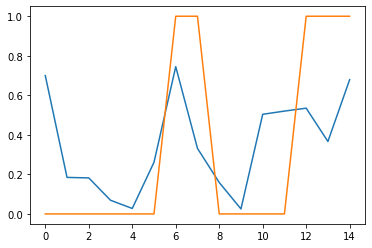

In [32]:
W = np.zeros(5)
learning_rate = 0.005
# losses = []
var = 2
i = 0

W_grad  = [1]
while(max(W_grad) > 0.0001):
    i += 1
    W_grad = likelihood_grad(x_train,y_train,W) + prior_grad(W,var)
    W = update_parameters(W, W_grad, learning_rate)
#     losses.append(loss(x_train,y_train, W).reshape(-1))
#     if i==0 or (i+1) % 200 == 0:
#         print("Iter %3d, loss = %.6f" % (i+1, loss(x_train,y_train, W)))
#         print(max(W_grad))

    print(max(W_grad))

Hess = likelihood_grad_2(x_train,y_train,W) + prior_grad_2(W, var)
# print(Hess.shape)
# print(log_gw(Hess))

margLikelihood = likelihood(x_train,y_train,W) + prior(W,var) - log_gw(Hess)
print('Marginal Likelihood is ', margLikelihood)
print('iteration mumber ', i)

prediction = Probability(x_test, W)
acc = accuracy(y_test,prediction)
print('Accuracy is', acc)
plt.plot(prediction)
plt.plot(y_test)
plt.show()

